In [1]:
from paddleocr import PaddleOCR,draw_ocr
import os

os.chdir("/home/ibrazebra/src/github.com/PaddleOCR/ppocr_img")

#ocr = PaddleOCR(use_angle_cls=True, lang='en') # need to run only once to download and load model into memory

In [2]:
!pwd

/home/ibrazebra/src/github.com/PaddleOCR/ppocr_img


In [ ]:
%pip install --upgrade pip
%pip install paddleocr

In [42]:
!paddleocr --image_dir ./imgs_en/img_12.jpg --use_angle_cls true --lang en --use_gpu false

/bin/zsh: /home/ibrazebra/miniconda3/envs/paddle_env/lib/libtinfo.so.6: no version information available (required by /bin/zsh)
[2023/12/10 03:04:52] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/ibrazebra/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/ibrazebra/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PG

In [3]:
!code --version

1.81.1
6c3e3dba23e8fadc360aed75ce363ba185c49794
x64


In [4]:
!python --version

Python 3.8.18


In [5]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 8.12.0
ipykernel        : 6.26.0
ipywidgets       : 8.1.1
jupyter_client   : 8.6.0
jupyter_core     : 5.5.0
jupyter_server   : 2.10.0
jupyterlab       : 4.0.8
nbclient         : 0.9.0
nbconvert        : 7.11.0
nbformat         : 5.9.2
notebook         : 7.0.6
qtconsole        : 5.5.0
traitlets        : 5.13.0


In [10]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            31Gi       2.1Gi        20Gi       3.0Mi       8.8Gi        28Gi
Swap:          8.0Gi          0B       8.0Gi


In [6]:
!python -m pip install --upgrade pip
!python -m pip install --upgrade jupyter

In [66]:
# 1. Import PaddleOCR class from paddleocr
from paddleocr import PaddleOCR

# 2. Declare the PaddleOCR class
ocr = PaddleOCR(use_angle_cls=True, lang='en', use_gpu=False) # need to run only once to download and load model into memory
#img_path ='./imgs_en/img_12.jpg'
# Golf scorecard example
img_path ='./imgs_en/StrokePlay_EX1.jpg'

# 3. Perform inference
result = ocr.ocr(img_path, rec=False) #`--rec`` false means no recognition is used, only text detection is performed
print(result)

[2023/12/10 03:22:41] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/ibrazebra/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/ibrazebra/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pg

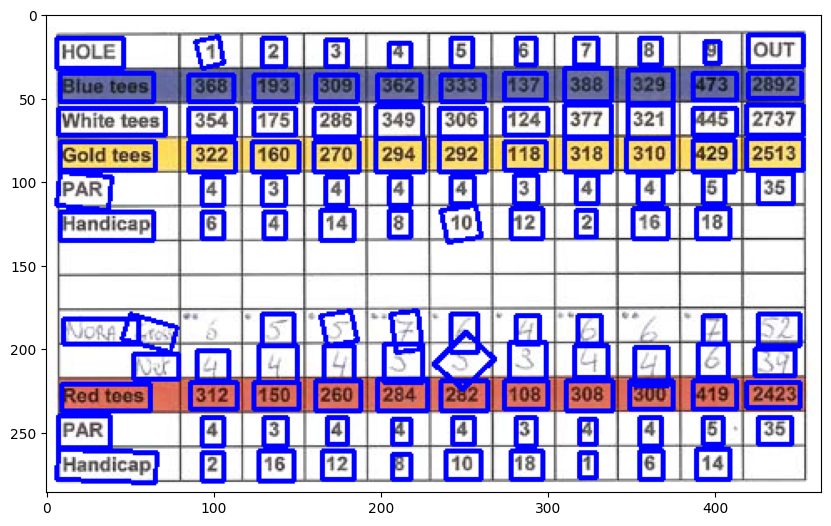

In [67]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# When using matplotlib.pyplot to draw in the notebook, you need to add this command to display
%matplotlib inline

boxes = result[0]  # Extracting the bounding boxes from the result

# 4. Visual inspection results
image = cv2.imread(img_path)

for box in boxes:
    # Reshape the box vertices
    box = np.reshape(np.array(box), [-1, 2]).astype(np.int64)

    image = cv2.polylines(np.array(image), [box], isClosed=True, color=(255, 0, 0), thickness=2)

# Draw the read picture
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()